In [3]:
!pip install pyod

  Created wheel for pyod: filename=pyod-0.8.7-py3-none-any.whl size=115982 sha256=003565c8758a155ce20b3df4d980a8ff648419afbd7d0d12ef43df063e0e7fd7
  Stored in directory: c:\users\kishorek\appdata\local\pip\cache\wheels\78\90\b9\f91c4696d71b99c5d1ac4265acb20eb9dd16828993470cfdd8
Successfully built pyod


In [5]:
import pandas as pd
import numpy as np

In [6]:
df = pd.read_csv("anomaly_detection_dataset_without_index.csv")

In [7]:
df.head()

,Avg_Rating,Rating_Score,Rating_Helpfulness,Rating_Time,Verified_Purchase
0,4.1,4.1,2,1.612159e+09,1
1,3.2,2.4,0,1.611297e+09,1
2,3.4,3.9,3,1.610138e+09,1
3,3.8,5.0,0,1.610011e+09,1
4,3.8,3.7,3,1.609725e+09,1


In [8]:
from pyod.models.iforest import IForest

In [9]:
limit = int(len(df) * .7)

X_train = df.iloc[:limit, :]
X_test = df.iloc[limit:, :]

In [10]:
X_test.head()

,Avg_Rating,Rating_Score,Rating_Helpfulness,Rating_Time,Verified_Purchase
14000,3.5,2.8,3,1.610999e+09,1
14001,3.5,3.6,2,1.610149e+09,1
14002,3.5,4.6,2,1.610398e+09,1
14003,3.5,3.3,0,1.612104e+09,1
14004,3.5,4.1,1,1.609908e+09,1


In [11]:
X_train.head()

,Avg_Rating,Rating_Score,Rating_Helpfulness,Rating_Time,Verified_Purchase
0,4.1,4.1,2,1.612159e+09,1
1,3.2,2.4,0,1.611297e+09,1
2,3.4,3.9,3,1.610138e+09,1
3,3.8,5.0,0,1.610011e+09,1
4,3.8,3.7,3,1.609725e+09,1


In [16]:
# from sklearn.preprocessing import StandardScaler
# X_train = StandardScaler().fit_transform(X_train)
# X_train = pd.DataFrame(X_train)

In [12]:
IForest_model = IForest(behaviour="new", max_samples=100)

In [13]:
IForest_model.fit(X_train)

IForest(behaviour='new', bootstrap=False, contamination=0.1, max_features=1.0,
    max_samples=100, n_estimators=100, n_jobs=1, random_state=None,
    verbose=0)

In [14]:
y_test_scores = IForest_model.decision_function(X_test)  # outlier scores
y_test_scores = pd.Series(y_test_scores)

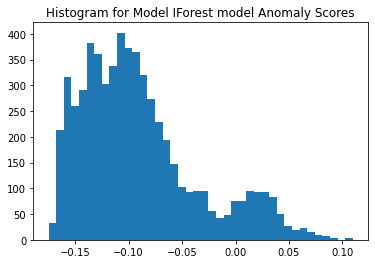

In [15]:
import matplotlib.pyplot as plt
plt.hist(y_test_scores, bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram for Model IForest model Anomaly Scores")
plt.show()

In [16]:
y_test_scores

0      -0.162347
1      -0.144354
2      -0.115785
3      -0.081164
4      -0.101659
          ...   
5995   -0.128285
5996   -0.142622
5997   -0.131600
5998   -0.114305
5999   -0.141977
Length: 6000, dtype: float64

In [18]:
y_predict = IForest_model.predict(X_test)

In [19]:
y_predict

array([0, 0, 0, ..., 0, 0, 0])

In [20]:
y_predict[:100]

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [59]:
import joblib

In [61]:
joblib.dump(IForest_model, 'IForest_Trained_Model.pkl')

['IForest_Trained_Model.pkl']

In [21]:
import pickle

In [24]:
pickle.dump(IForest_model, open('IForest_Trained_Model_Pickle.pkl', 'wb'))